# EDA

This notebook focuses on the various Data Analysis techniques used for Stock Market and time series data.

## Import Libraries

In [1]:
# import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import utils.data as data

## Load data

In [2]:
start_date = "2008-10-01"
end_date = "2024-11-01"
target = "XOM"
phase=30

df = data.get_data_with_signal(target, start_date, end_date)
df.index = pd.to_datetime(df.index)
df.head()

,XOM_Close,XOM_Volume,XOM_close_d,XOM_volume_d,XOM_rsi_week,XOM_rsi_month,XOM_rsi_quarter,XOM_vrsi_week,XOM_vrsi_month,XOM_vrsi_quarter,XOM_roc,XOM_macd,XOM_vmacd_s
Date,,,,,,,,,,,,,
2008-12-24 00:00:00-05:00,42.410042,11295800,0.009055,-0.654539,38.102700,49.055129,49.759347,37.754845,44.695777,49.759347,-4.799012,0.139583,-1.665445e+06
2008-12-26 00:00:00-05:00,43.199135,17024000,0.018606,0.507109,51.388970,50.793965,50.459800,43.560327,45.699121,50.459800,-1.291559,0.125290,-2.687450e+06
2008-12-29 00:00:00-05:00,43.663654,22839900,0.010753,0.341629,58.019717,51.813117,50.869860,51.194228,47.055622,50.869860,-2.560247,0.149719,-3.675575e+06
2008-12-30 00:00:00-05:00,43.982655,25122300,0.007306,0.099930,62.420008,52.523936,51.152231,58.847297,48.543926,51.152231,-1.787048,0.192600,-4.545875e+06
2008-12-31 00:00:00-05:00,44.676605,30026400,0.015778,0.195209,70.755449,54.075219,51.765523,66.658289,50.301584,51.765523,-0.770690,0.279360,-5.208099e+06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3990 entries, 2008-12-24 00:00:00-05:00 to 2024-10-31 00:00:00-04:00
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   XOM_Close         3990 non-null   float64
 1   XOM_Volume        3990 non-null   int64  
 2   XOM_close_d       3990 non-null   float64
 3   XOM_volume_d      3990 non-null   float64
 4   XOM_rsi_week      3990 non-null   float64
 5   XOM_rsi_month     3990 non-null   float64
 6   XOM_rsi_quarter   3990 non-null   float64
 7   XOM_vrsi_week     3990 non-null   float64
 8   XOM_vrsi_month    3990 non-null   float64
 9   XOM_vrsi_quarter  3990 non-null   float64
 10  XOM_roc           3990 non-null   float64
 11  XOM_macd          3990 non-null   float64
 12  XOM_vmacd_s       3990 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 436.4 KB


## EDA

References:

- [Time Series Forecasting: A Practical Guide to Exploratory Data Analysis](https://towardsdatascience.com/time-series-forecasting-a-practical-guide-to-exploratory-data-analysis-a101dc5f85b1)
- [How to Do an EDA for Time-Series](https://towardsdatascience.com/how-to-do-an-eda-for-time-series-cbb92b3b1913)
- [Financial Analytics — Exploratory Data Analysis of stock data](https://towardsdatascience.com/financial-analytics-exploratory-data-analysis-of-stock-data-d98cbadf98b9)

In [4]:
df.describe()

,XOM_Close,XOM_Volume,XOM_close_d,XOM_volume_d,XOM_rsi_week,XOM_rsi_month,XOM_rsi_quarter,XOM_vrsi_week,XOM_vrsi_month,XOM_vrsi_quarter,XOM_roc,XOM_macd,XOM_vmacd_s
count,3990.000000,3.990000e+03,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3.990000e+03
mean,60.346673,1.822524e+07,0.000381,0.045342,51.838917,51.545135,51.245803,50.212945,49.949656,51.245803,0.440732,0.133800,-7.080812e+04
std,20.982548,9.814336e+06,0.015800,0.342307,19.594177,9.751278,5.366771,17.321702,8.919864,5.366771,5.255175,0.976747,1.308640e+06
min,25.236977,3.851300e+06,-0.122248,-0.806843,3.203541,19.097453,29.032274,2.947746,18.411388,29.032274,-38.530073,-5.533219,-5.671868e+06
25%,48.946977,1.142940e+07,-0.007397,-0.154764,37.329283,44.816425,47.707787,38.119042,44.652145,47.707787,-2.224804,-0.429990,-6.627049e+05
50%,56.223608,1.569680e+07,0.000157,-0.010849,52.990257,51.420433,50.886192,50.395226,50.137733,50.886192,0.467220,0.111427,-1.741601e+05
75%,61.746423,2.204162e+07,0.008144,0.179806,66.565195,58.241096,54.778540,62.685043,55.665306,54.778540,3.057842,0.641006,4.168655e+05
max,125.370003,1.180235e+08,0.126868,4.339637,96.384560,81.321150,70.470869,96.873739,77.961959,70.470869,39.427624,4.067740,9.360216e+06


(array([13879.20833333, 14610.20833333, 15340.20833333, 16071.20833333,
        16801.20833333, 17532.20833333, 18262.20833333, 18993.20833333,
        19723.20833333, 20454.20833333]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

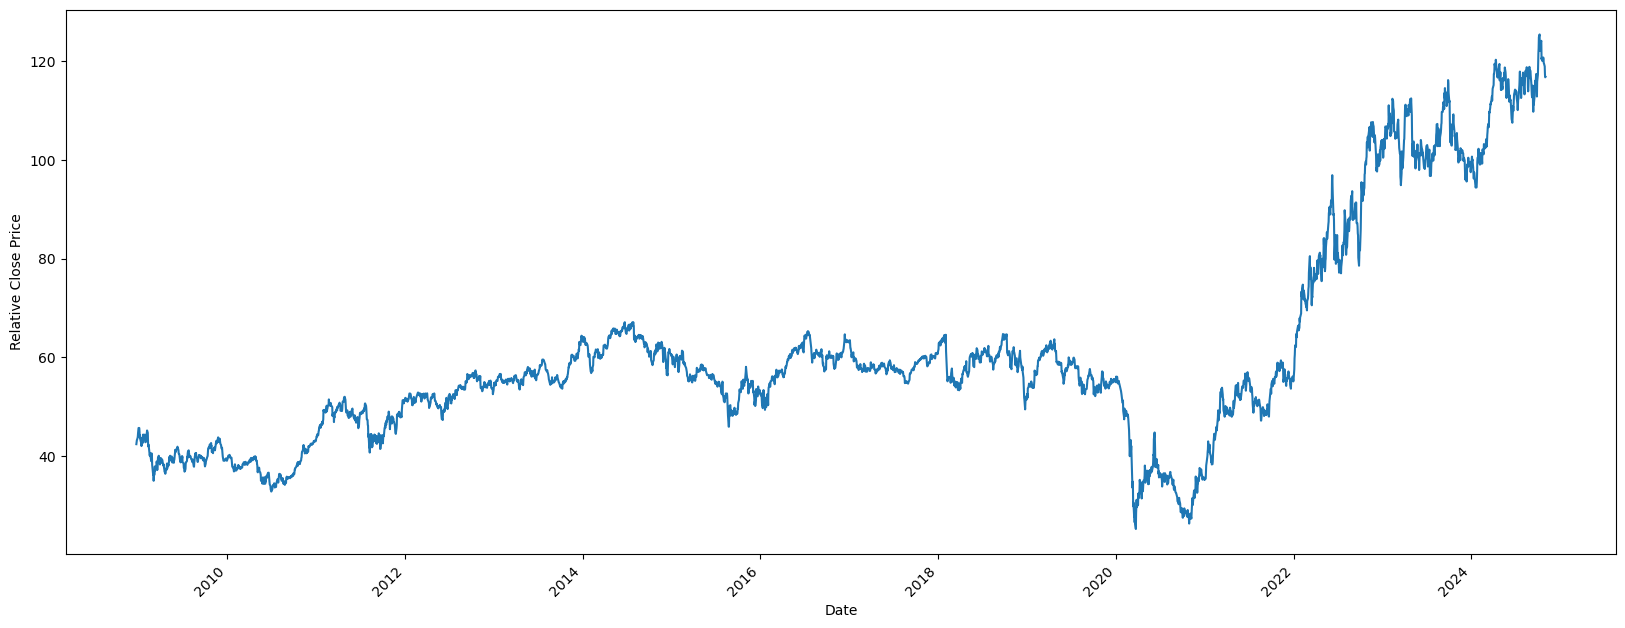

In [5]:
plt.figure(figsize=(20, 8))
df["XOM_Close"].plot()
plt.xlabel("Date")
plt.ylabel("Relative Close Price")
plt.xticks(rotation=45)

<AxesSubplot:xlabel='XOM_close_d', ylabel='Count'>

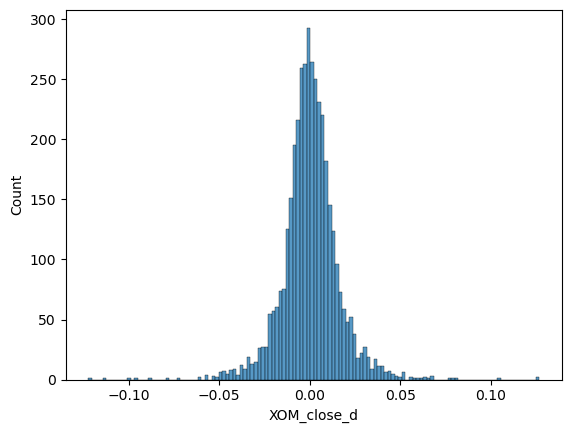

In [6]:
sns.histplot(df["XOM_close_d"])

(array([13879.20833333, 14610.20833333, 15340.20833333, 16071.20833333,
        16801.20833333, 17532.20833333, 18262.20833333, 18993.20833333,
        19723.20833333, 20454.20833333]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

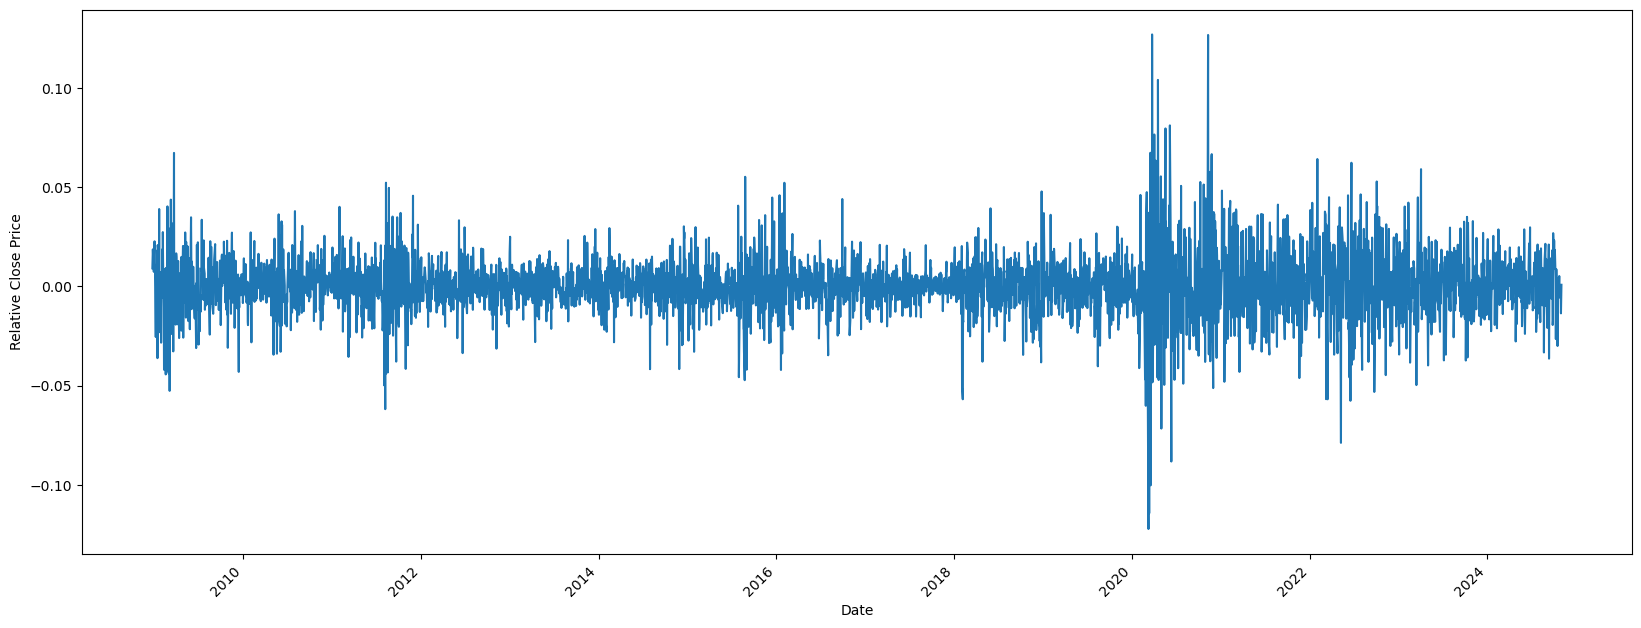

In [7]:
plt.figure(figsize=(20, 8))
df["XOM_close_d"].plot()
plt.xlabel("Date")
plt.ylabel("Relative Close Price")
plt.xticks(rotation=45)

In [8]:
# Defining required fields
df["year"] = [x for x in df.index.year]
df["month"] = [x for x in df.index.month]
df = df.reset_index()
df["week"] = df["Date"].apply(lambda x: x.week)
df = df.set_index("Date")
df["hour"] = [x for x in df.index.hour]
df["day"] = [x for x in df.index.day_of_week]
df["day_str"] = [x.strftime("%a") for x in df.index]
df["year_month"] = [str(x.year) + "_" + str(x.month) for x in df.index]

C:\Users\hites\AppData\Local\Temp\ipykernel_19200\3307951591.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df["week"] = df["Date"].apply(lambda x: x.week)


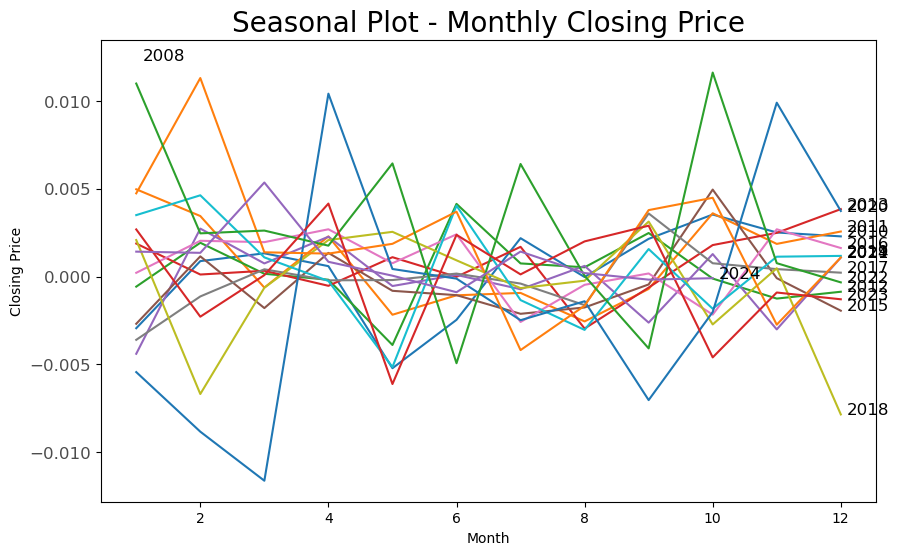

In [9]:
# Defining colors palette
df_plot = (
    df[["month", "year", "XOM_close_d"]]
    .dropna()
    .groupby(["month", "year"])
    .mean()[["XOM_close_d"]]
    .reset_index()
)
years = df_plot["year"].unique()


# Plot
plt.figure(figsize=(10, 6))
for i, y in enumerate(years):
    if i > 0:
        plt.plot(
            "month",
            "XOM_close_d",
            data=df_plot[df_plot["year"] == y],
            label=y,
        )
        plt.text(
            df_plot.loc[df_plot.year == y, :].shape[0] + 0.1,
            df_plot.loc[df_plot.year == y, "XOM_close_d"][-1:].values[0],
            y,
            fontsize=12,
        )

# Setting labels
plt.gca().set(ylabel="XOM_close_d", xlabel="Month")
plt.yticks(fontsize=12, alpha=0.7)
plt.title("Seasonal Plot - Monthly Closing Price", fontsize=20)
plt.ylabel("Closing Price")
plt.xlabel("Month")
plt.show()

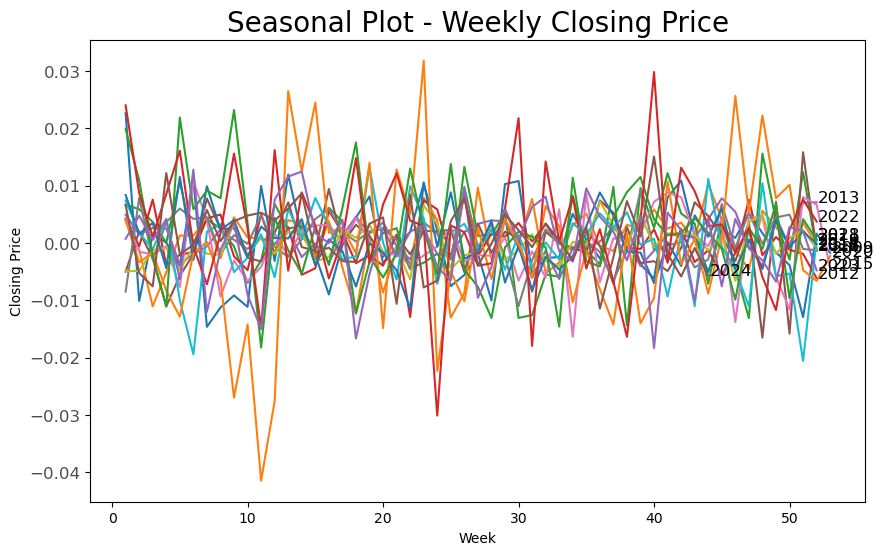

In [10]:
# Defining colors palette
df_plot = (
    df[["week", "year", "XOM_close_d"]]
    .dropna()
    .groupby(["week", "year"])
    .mean()[["XOM_close_d"]]
    .reset_index()
)
years = df_plot["year"].unique()


# Plot
plt.figure(figsize=(10, 6))
for i, y in enumerate(years):
    if i > 0:
        plt.plot(
            "week",
            "XOM_close_d",
            data=df_plot[df_plot["year"] == y],
            label=y,
        )
        plt.text(
            df_plot.loc[df_plot.year == y, :].shape[0] + 0.1,
            df_plot.loc[df_plot.year == y, "XOM_close_d"][-1:].values[0],
            y,
            fontsize=12,
        )

# Setting labels
plt.gca().set(ylabel="XOM_close_d", xlabel="Week")
plt.yticks(fontsize=12, alpha=0.7)
plt.title("Seasonal Plot - Weekly Closing Price", fontsize=20)
plt.ylabel("Closing Price")
plt.xlabel("Week")
plt.show()

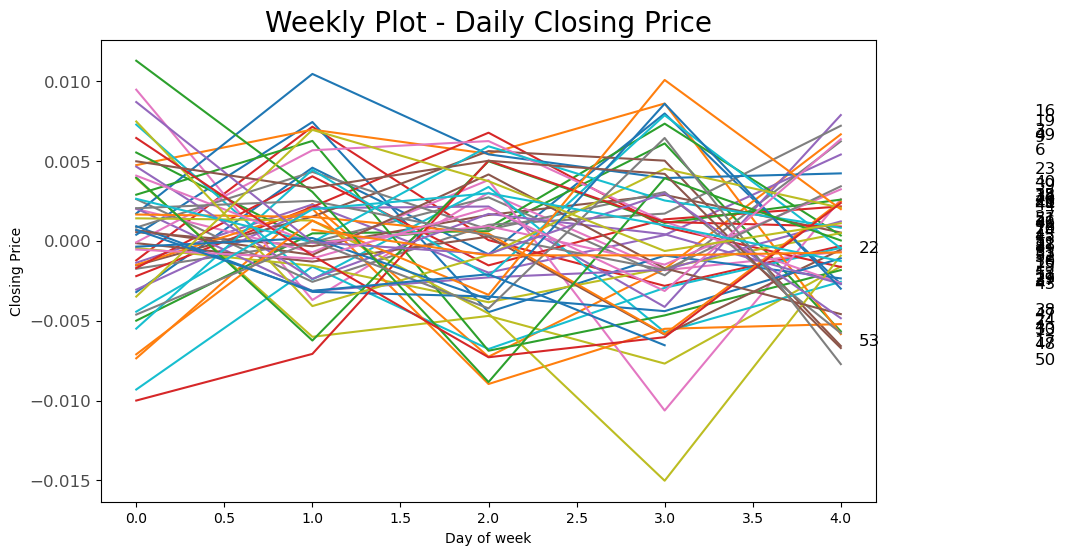

In [11]:
# Defining colors palette
df_plot = (
    df[["day", "week", "XOM_close_d"]]
    .dropna()
    .groupby(["day", "week"])
    .mean()[["XOM_close_d"]]
    .reset_index()
)
weeks = df_plot["week"].unique()


# Plot
plt.figure(figsize=(10, 6))
for i, y in enumerate(weeks):
    if i > 0:
        plt.plot(
            "day",
            "XOM_close_d",
            data=df_plot[df_plot["week"] == y],
            label=y,
        )
        plt.text(
            df_plot.loc[df_plot.week == y, :].shape[0] + 0.1,
            df_plot.loc[df_plot.week == y, "XOM_close_d"][-1:].values[0],
            y,
            fontsize=12,
        )

# Setting labels
plt.gca().set(ylabel="XOM_close_d", xlabel="Day")
plt.yticks(fontsize=12, alpha=0.7)
plt.title("Weekly Plot - Daily Closing Price", fontsize=20)
plt.ylabel("Closing Price")
plt.xlabel("Day of week")
plt.show()

## Feature Engineering

## Data Preprocessing